In [9]:
import pandas as pd

In [15]:
from urllib.request import urlretrieve
import tarfile
import os 
import gzip
import shutil
url = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz'
filename = 'housing.tgz'
urlretrieve(url, filename)
with tarfile.open(filename, 'r:gz') as tar:
    tar.extractall()

In [17]:
extracted_filename = 'housing.csv'
compressed_filename = 'housing.csv.gz'
with open(extracted_filename, 'rb') as f_in, gzip.open(compressed_filename, 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)

In [19]:
df = pd.read_csv('housing.csv.gz')

In [20]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [22]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [23]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [24]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

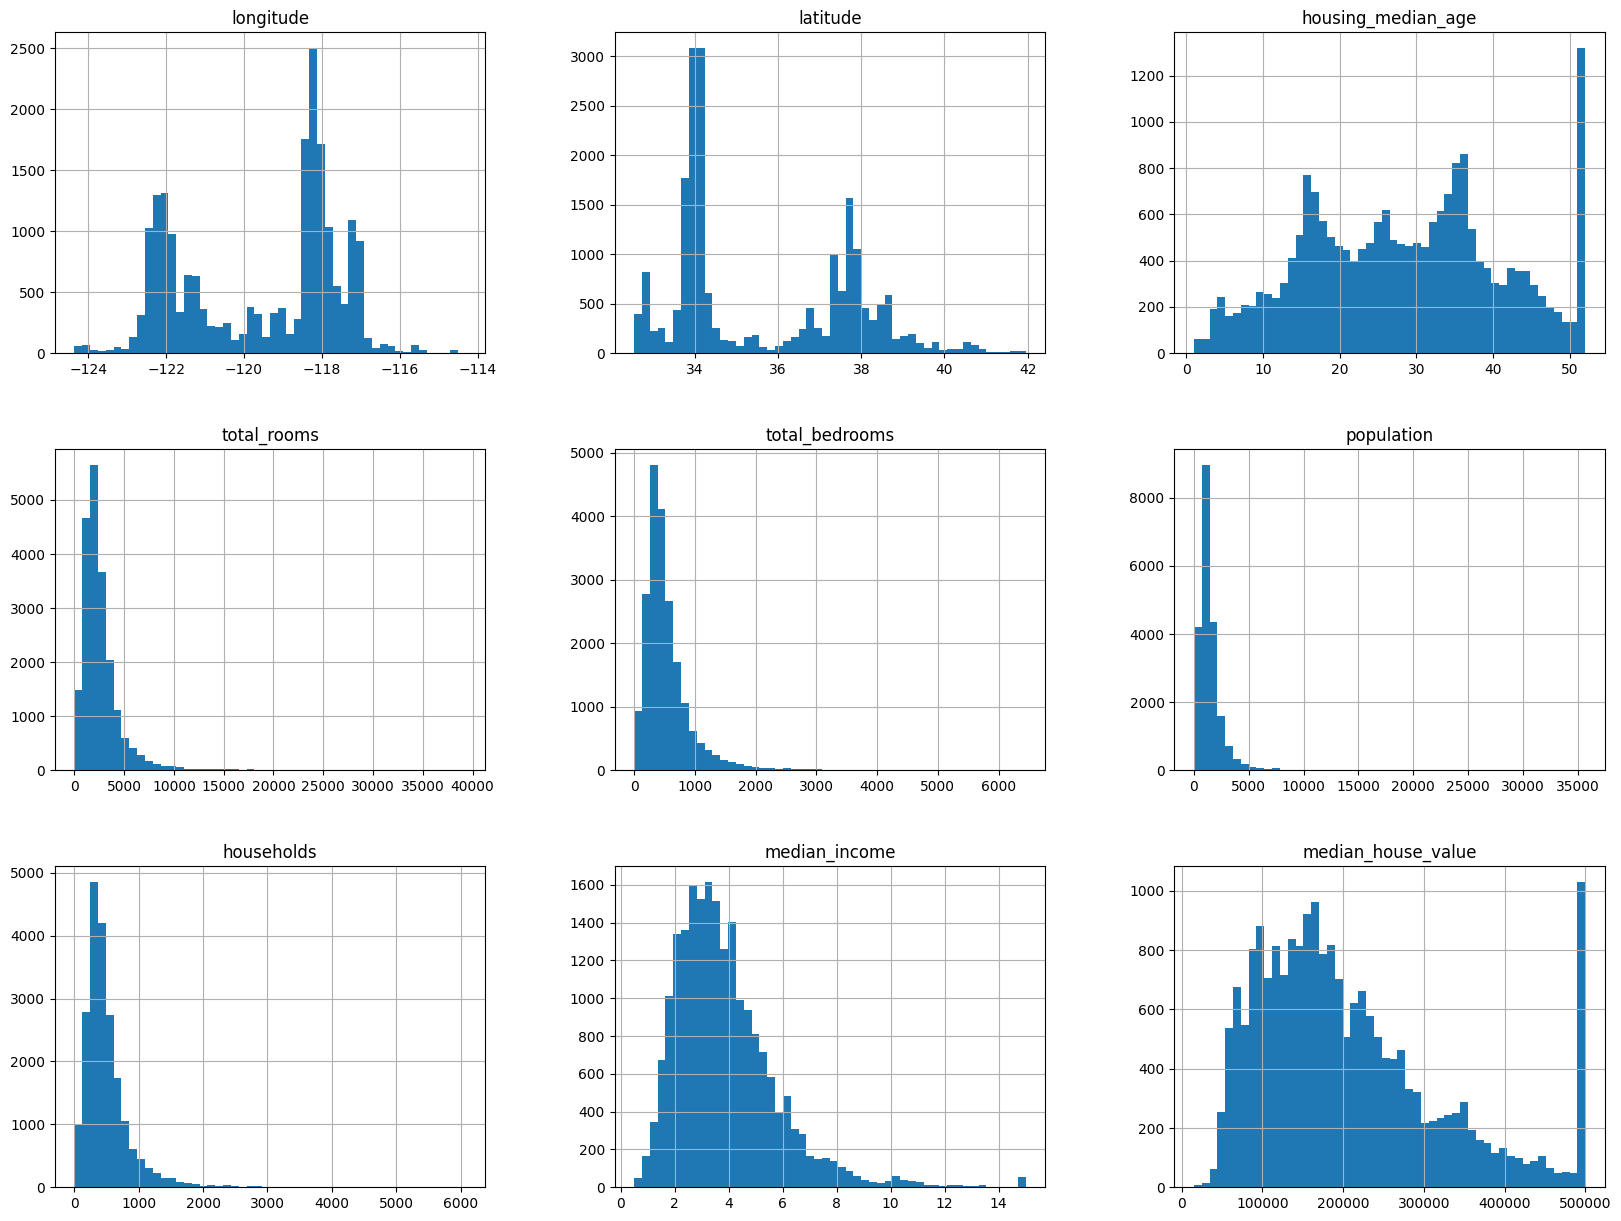

In [27]:
df.hist(bins=50, figsize=(20,15))

<Axes: xlabel='longitude', ylabel='latitude'>

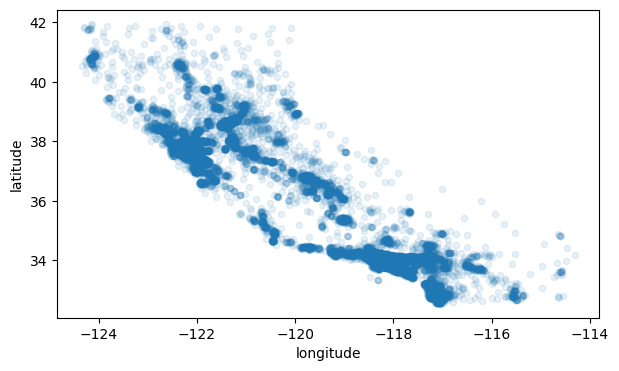

In [28]:
df.plot(kind="scatter", x="longitude", y="latitude",
alpha=0.1, figsize=(7,4))

In [29]:
import matplotlib.pyplot as plt

<Axes: xlabel='longitude', ylabel='latitude'>

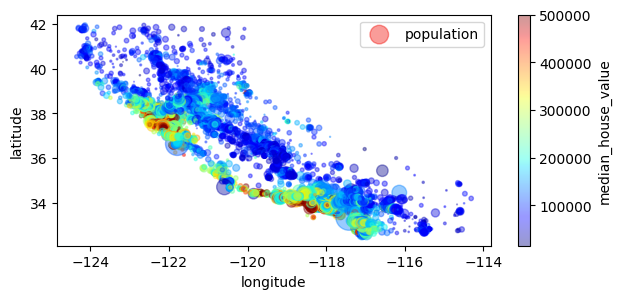

In [30]:
df.plot(kind="scatter", x="longitude", y="latitude",
alpha=0.4, figsize=(7,3), colorbar=True,
s=df["population"]/100, label="population",
c="median_house_value", cmap=plt.get_cmap("jet"))

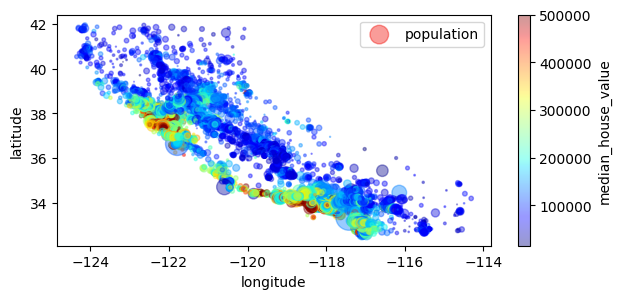

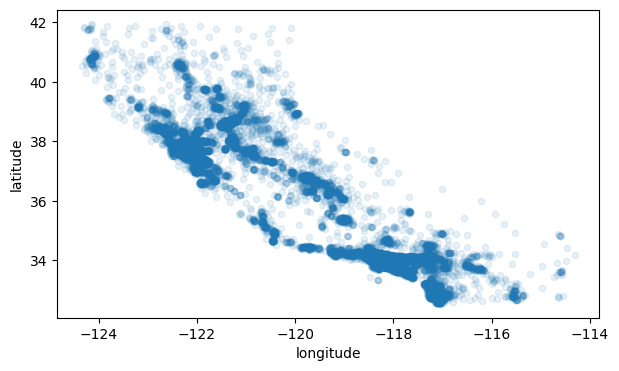

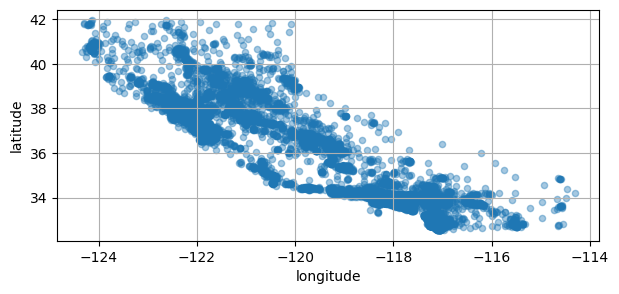

In [31]:
plot = df.plot(kind="scatter", x="longitude", y="latitude",
alpha=0.4, figsize=(7,3), colorbar=True,
s=df["population"]/100, label="population",
c="median_house_value", cmap=plt.get_cmap("jet"))
fig1 = plot.get_figure()
fig1.savefig("obraz1.png")


plot2 = df.plot(kind="scatter", x="longitude", y="latitude",
alpha=0.1, figsize=(7,4))
fig2 = plot2.get_figure()
fig2.savefig("obraz2.png")


plot3 = df.plot(kind="scatter", x="longitude",
                y="latitude", alpha=0.4,
                figsize=(7,3), grid=True)
fig3 = plot3.get_figure()
fig3.savefig("obraz3.png")

In [37]:
# Wybierz tylko kolumny numeryczne
numerical_df = df.select_dtypes(include=['number'])

# Oblicz korelacje
df_corr = numerical_df.corr()["median_house_value"].sort_values(ascending=False)

# Przekształć wynik do serii pandas
df_corr = pd.Series(df_corr).reset_index()

# Zmień nazwy kolumn
df_corr.columns = ["atrybut", "wspolczynnik_korelacji"]


In [38]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split

# Wczytanie danych
df = pd.read_csv("housing.csv")

# Podział danych na zbiór uczący i testujący
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

# Obliczenie długości zbiorów
print("Długość zbioru uczącego:", len(train_set))
print("Długość zbioru testującego:", len(test_set))

# Wybierz tylko kolumny numeryczne
numerical_df_train = train_set.select_dtypes(include=['number'])

# Obliczenie macierzy korelacji dla zbioru uczącego
df_c1 = numerical_df_train.corr()["median_house_value"].sort_values(ascending=False)
print("\nMacierz korelacji zbioru uczącego\n\n", df_c1, "\n\n")

# Wybierz tylko kolumny numeryczne
numerical_df_test = test_set.select_dtypes(include=['number'])

# Obliczenie macierzy korelacji dla zbioru testującego
df_c2 = numerical_df_test.corr()["median_house_value"].sort_values(ascending=False)
print("Macierz korelacji zbioru testującego\n\n", df_c2, "\n\n")

# Zapisanie zbiorów do plików pickle
with open("train_set.pkl", "wb") as f:
    pickle.dump(train_set, f)

with open("test_set.pkl", "wb") as f:
    pickle.dump(test_set, f)


Długość zbioru uczącego: 16512
Długość zbioru testującego: 4128

Macierz korelacji zbioru uczącego

 median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64 


Macierz korelacji zbioru testującego

 median_house_value    1.000000
median_income         0.677502
total_rooms           0.134697
housing_median_age    0.113585
households            0.074249
total_bedrooms        0.056667
population           -0.019003
longitude            -0.044062
latitude             -0.149295
Name: median_house_value, dtype: float64 


